[ref](https://jamtrading.jp/blogs/jam/1024509/)

# Import

In [1]:
import sys

sys.path.append("../")
import json
import warnings
from string import Template
from time import sleep

import matplotlib.pyplot as plt
import pandas as pd
import requests
from tqdm import tqdm

from vook_db_v7.config import MAX_PAGE, REQ_URL, WANT_ITEMS_RAKUTEN, req_params


Bad key ; font.family in file /Users/ozawaatsushi/.matplotlib/matplotlibrc, line 262 ('; font.family:  IPAexGothic')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.9.0/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution


Now: Local env


In [2]:
import matplotlib

print(matplotlib.matplotlib_fname())

/Users/ozawaatsushi/.matplotlib/matplotlibrc


In [3]:
band_list = [
    "ローリングストーンズ",
    "ジミヘン",
    "レッド ツェッペリン",
    "デヴィッドボウイ",
    "METALLICA",
    "Guns N’ Roses",
    "KISS",
    "アイアンメイデン",
    "スレイヤー",
    "ランシド",
    "セックスピストルズ",
    "RAMONES",
    "ミスフィッツ",
    "the casualties",
    "ニルヴァーナ",
    "カートコバーン",
    "The velvet underground",
    "pearl jam",
    "foo fighters",
    "スリップノット",
    "Korn",
    "Rage Against the Machine",
    "Linkin Park",
    "Deftones",
    "PINK FLOYD",
    "JOURNEY",
]

item = "Tシャツ"
req_params["minPrice"] = 10000
MAX_PAGE = 100
not_200_msg = Template("ErrorCode -> $res_code\nError -> $res['error']\nPage -> $cnt")
not_hit_msg = "返ってきた商品数の数が0なので、ループ終了"
max_page_msg = "MAX PAGEに到達したので、ループ終了"

In [4]:
def loop_request(
    req_params: dict,
    cnt: int,
    df: pd.DataFrame,
    REQ_URL: str = REQ_URL,
    not_200_msg: str = not_200_msg,
    not_hit_msg: str = not_hit_msg,
    max_page_msg: str = max_page_msg,
) -> pd.DataFrame:
    while True:
        req_params["page"] = cnt
        res = requests.get(REQ_URL, req_params)
        res_code = res.status_code
        res = json.loads(res.text)
        d_template = {"res_code": res_code, "res": res, "cnt": cnt}
        if res_code != 200:
            print(not_200_msg.safe_substitute(d_template))
            break
        else:
            if res["hits"] == 0:
                print(not_hit_msg)
                break
            tmp_df = pd.DataFrame(res["Items"])[WANT_ITEMS_RAKUTEN]
            df = pd.concat([df, tmp_df], ignore_index=True)
        if cnt == MAX_PAGE:
            print(max_page_msg)
            break
        cnt += 1
        # リクエスト制限回避
        sleep(1)
    return df

In [5]:
l_df_main = []
for band_name in tqdm(band_list):
    print("1:settings")
    cnt = 1
    keyword = " ".join([item, band_name])
    req_params["page"] = cnt
    req_params["keyword"] = keyword
    print(f"keyword:{keyword}")
    print("2:loop request")
    df = pd.DataFrame(columns=WANT_ITEMS_RAKUTEN)
    df = loop_request(req_params, cnt, df)
    print("3:postprocess")
    df_main = df.rename(
        columns={"itemName": "name", "itemPrice": "price", "itemUrl": "url"}
    )
    df_main["band_name"] = band_name
    l_df_main.append(df_main)
df_main_all = pd.concat(l_df_main, ignore_index=True)

  0%|                                                                                          | 0/26 [00:00<?, ?it/s]

1:settings
keyword:Tシャツ ローリングストーンズ
2:loop request


  4%|███▏                                                                              | 1/26 [00:08<03:32,  8.49s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ ジミヘン
2:loop request


  8%|██████▎                                                                           | 2/26 [00:09<01:40,  4.20s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ レッド ツェッペリン
2:loop request


 12%|█████████▍                                                                        | 3/26 [00:10<01:05,  2.83s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ デヴィッドボウイ
2:loop request


 15%|████████████▌                                                                     | 4/26 [00:12<00:47,  2.18s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ METALLICA
2:loop request


 19%|███████████████▊                                                                  | 5/26 [00:16<01:03,  3.04s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ Guns N’ Roses
2:loop request


 23%|██████████████████▉                                                               | 6/26 [00:18<00:55,  2.79s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ KISS
2:loop request


 27%|██████████████████████                                                            | 7/26 [00:27<01:27,  4.61s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ アイアンメイデン
2:loop request


 31%|█████████████████████████▏                                                        | 8/26 [00:29<01:09,  3.89s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ スレイヤー
2:loop request


 35%|████████████████████████████▍                                                     | 9/26 [00:42<01:52,  6.61s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ ランシド
2:loop request


 38%|███████████████████████████████▏                                                 | 10/26 [00:43<01:18,  4.93s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ セックスピストルズ
2:loop request


 42%|██████████████████████████████████▎                                              | 11/26 [00:44<00:57,  3.85s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ RAMONES
2:loop request


 46%|█████████████████████████████████████▍                                           | 12/26 [00:46<00:42,  3.05s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ ミスフィッツ
2:loop request


 50%|████████████████████████████████████████▌                                        | 13/26 [00:47<00:32,  2.49s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ the casualties
2:loop request
返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ ニルヴァーナ
2:loop request


 58%|██████████████████████████████████████████████▋                                  | 15/26 [00:52<00:26,  2.45s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ カートコバーン
2:loop request


 62%|█████████████████████████████████████████████████▊                               | 16/26 [00:56<00:29,  2.97s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ The velvet underground
2:loop request


 65%|████████████████████████████████████████████████████▉                            | 17/26 [00:57<00:22,  2.51s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ pearl jam
2:loop request


 69%|████████████████████████████████████████████████████████                         | 18/26 [00:58<00:17,  2.15s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ foo fighters
2:loop request


 73%|███████████████████████████████████████████████████████████▏                     | 19/26 [01:00<00:13,  1.89s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ スリップノット
2:loop request


 77%|██████████████████████████████████████████████████████████████▎                  | 20/26 [01:02<00:12,  2.02s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ Korn
2:loop request


 81%|█████████████████████████████████████████████████████████████████▍               | 21/26 [01:04<00:10,  2.09s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ Rage Against the Machine
2:loop request


 85%|████████████████████████████████████████████████████████████████████▌            | 22/26 [01:05<00:07,  1.83s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ Linkin Park
2:loop request


 88%|███████████████████████████████████████████████████████████████████████▋         | 23/26 [01:07<00:04,  1.64s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ Deftones
2:loop request


 92%|██████████████████████████████████████████████████████████████████████████▊      | 24/26 [01:08<00:03,  1.50s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ PINK FLOYD
2:loop request


 96%|█████████████████████████████████████████████████████████████████████████████▉   | 25/26 [01:12<00:02,  2.41s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ JOURNEY
2:loop request


100%|█████████████████████████████████████████████████████████████████████████████████| 26/26 [01:15<00:00,  2.89s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess


In [21]:
print("shape:", df_main_all.shape)

shape: (1489, 4)


In [22]:
s = df_main_all.groupby("band_name").nunique()["name"]
print(
    "バンド別商品数:",
    s.sort_values(ascending=False),
)

バンド別商品数: band_name
スレイヤー                       230
KISS                        182
ローリングストーンズ                  176
METALLICA                   106
PINK FLOYD                  102
カートコバーン                      98
ニルヴァーナ                       96
JOURNEY                      37
スリップノット                      37
Guns N’ Roses                36
アイアンメイデン                     35
ミスフィッツ                       30
pearl jam                    29
Korn                         27
レッド ツェッペリン                   26
RAMONES                      20
デヴィッドボウイ                     19
Rage Against the Machine     18
ジミヘン                         15
セックスピストルズ                    13
Linkin Park                   3
foo fighters                  2
The velvet underground        2
ランシド                          1
Deftones                      1
Name: name, dtype: int64


In [24]:
df_product_num_per_band_name = s.reset_index()
sample_size = 30
band_list_over_sample_size = df_product_num_per_band_name[
    df_product_num_per_band_name["name"] > sample_size
]["band_name"].tolist()
print("十分なサンプルサイズを持つバンド名", band_list_over_sample_size)

十分なサンプルサイズを持つバンド名 ['Guns N’ Roses', 'JOURNEY', 'KISS', 'METALLICA', 'PINK FLOYD', 'アイアンメイデン', 'カートコバーン', 'スリップノット', 'スレイヤー', 'ニルヴァーナ', 'ローリングストーンズ']


In [26]:
df_main_filtered = df_main_all[
    df_main_all["band_name"].isin(band_list_over_sample_size)
].reset_index(drop=True)
df_main_filtered

,name,price,url,band_name
0,"90's ROLLING STONES USA製 ""3 Ball Charlie"" ロックバ...",107800,https://hb.afl.rakuten.co.jp/hgc/g00taeee.brn1...,ローリングストーンズ
1,"【中古】70's The Rolling Stones/ローリング・ストーンズ ""Tour ...",87780,https://hb.afl.rakuten.co.jp/hgc/g00tzn6e.brn1...,ローリングストーンズ
2,DEADSTOCK 90s USA製 ヴィンテージ ローリングストーンズ The Rolli...,84800,https://hb.afl.rakuten.co.jp/hgc/g00rgike.brn1...,ローリングストーンズ
3,DEADSTOCK 90s USA製 ヴィンテージ ローリングストーンズ The Rolli...,84800,https://hb.afl.rakuten.co.jp/hgc/g00rgike.brn1...,ローリングストーンズ
4,COMMEdesGARCONS コムデギャルソン xVersaceヴェルサーチェ【21年製】...,83600,https://hb.afl.rakuten.co.jp/hgc/g00s68be.brn1...,ローリングストーンズ
...,...,...,...,...
1271,"(取寄) アイベックス ジャーニー T-シャツ - メリノ ウール, ショート スリーブ I...",10390,https://hb.afl.rakuten.co.jp/hgc/g00qwfoe.brn1...,JOURNEY
1272,"(取寄) アイベックス ジャーニー シャツ - メリノ ウール, ショート スリーブ Ibe...",10390,https://hb.afl.rakuten.co.jp/hgc/g00rhtxe.brn1...,JOURNEY
1273,"(取寄) アイベックス ジャーニー T-シャツ - メリノ ウール, ショート スリーブ I...",10390,https://hb.afl.rakuten.co.jp/hgc/g00rhtxe.brn1...,JOURNEY
1274,"(取寄) アイベックス ジャーニー シャツ - メリノ ウール, ショート スリーブ Ibe...",10390,https://hb.afl.rakuten.co.jp/hgc/g00qwfoe.brn1...,JOURNEY


In [30]:
df_main_filtered.groupby("band_name")["price"].median()
print(
    "バンド別商品数:",
    s.sort_values(ascending=False),
)

バンド別商品数: band_name
ニルヴァーナ                      34750.0
pearl jam                   34000.0
Rage Against the Machine    33687.5
The velvet underground      28985.0
foo fighters                26180.0
METALLICA                   22500.0
カートコバーン                     21725.0
Guns N’ Roses               21175.0
Korn                        19690.0
ジミヘン                        19690.0
ランシド                        17380.0
アイアンメイデン                    17090.0
セックスピストルズ                   17050.0
ローリングストーンズ                  16335.0
PINK FLOYD                  16200.0
Linkin Park                 16200.0
KISS                        16200.0
デヴィッドボウイ                    14850.0
レッド ツェッペリン                  14600.0
スレイヤー                       13970.0
スリップノット                     13563.0
ミスフィッツ                      13090.0
RAMONES                     12107.5
JOURNEY                     11958.0
Deftones                    10620.0
Name: price, dtype: object


In [30]:
df_main_filtered.groupby("band_name")["price"].median()
print(
    "バンド別商品数:",
    s.sort_values(ascending=False),
)

バンド別商品数: band_name
ニルヴァーナ                      34750.0
pearl jam                   34000.0
Rage Against the Machine    33687.5
The velvet underground      28985.0
foo fighters                26180.0
METALLICA                   22500.0
カートコバーン                     21725.0
Guns N’ Roses               21175.0
Korn                        19690.0
ジミヘン                        19690.0
ランシド                        17380.0
アイアンメイデン                    17090.0
セックスピストルズ                   17050.0
ローリングストーンズ                  16335.0
PINK FLOYD                  16200.0
Linkin Park                 16200.0
KISS                        16200.0
デヴィッドボウイ                    14850.0
レッド ツェッペリン                  14600.0
スレイヤー                       13970.0
スリップノット                     13563.0
ミスフィッツ                      13090.0
RAMONES                     12107.5
JOURNEY                     11958.0
Deftones                    10620.0
Name: price, dtype: object


ローリングストーンズ：商品数：176


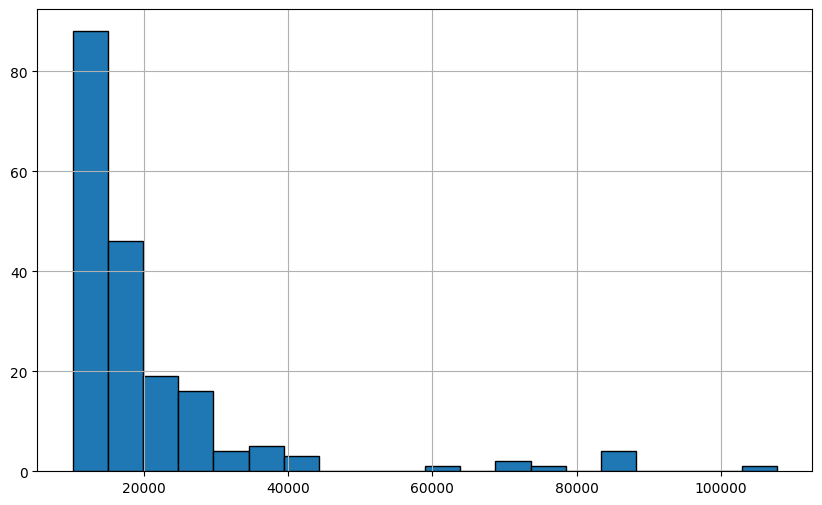

METALLICA：商品数：106


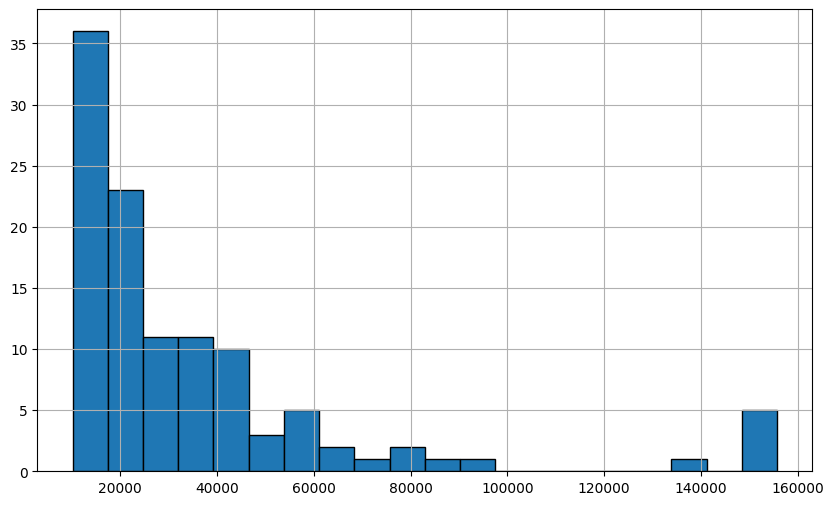

Guns N’ Roses：商品数：36


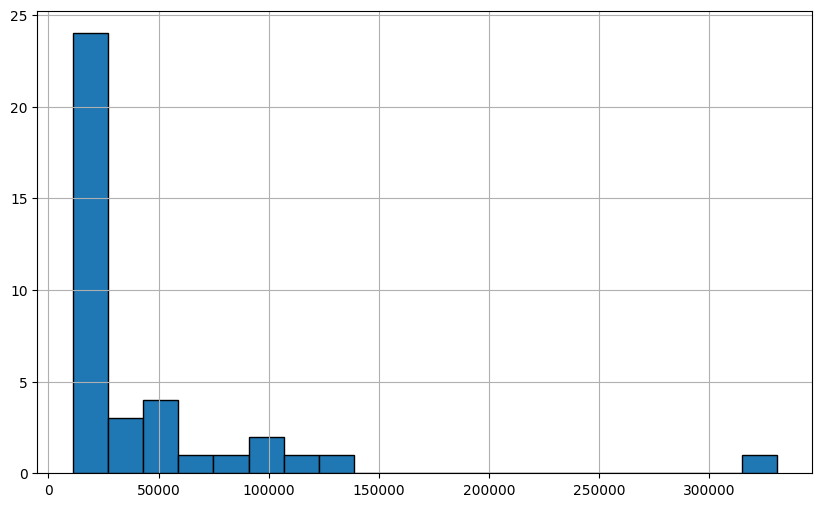

KISS：商品数：182


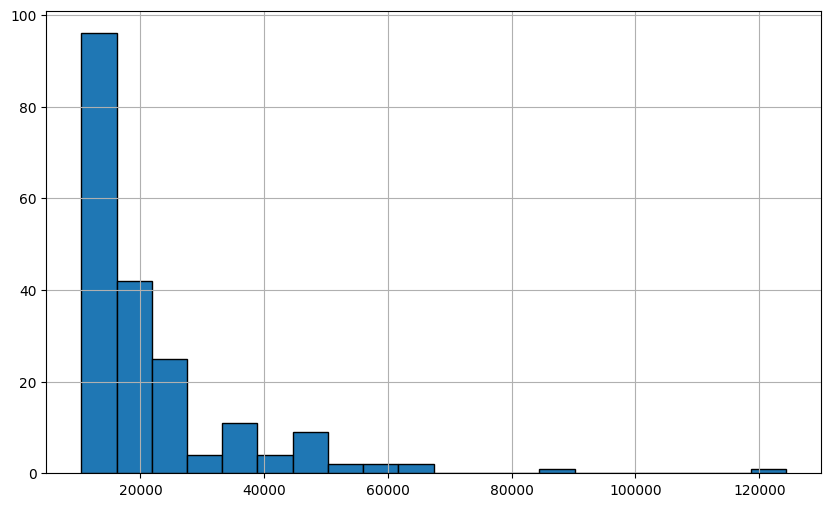

アイアンメイデン：商品数：35


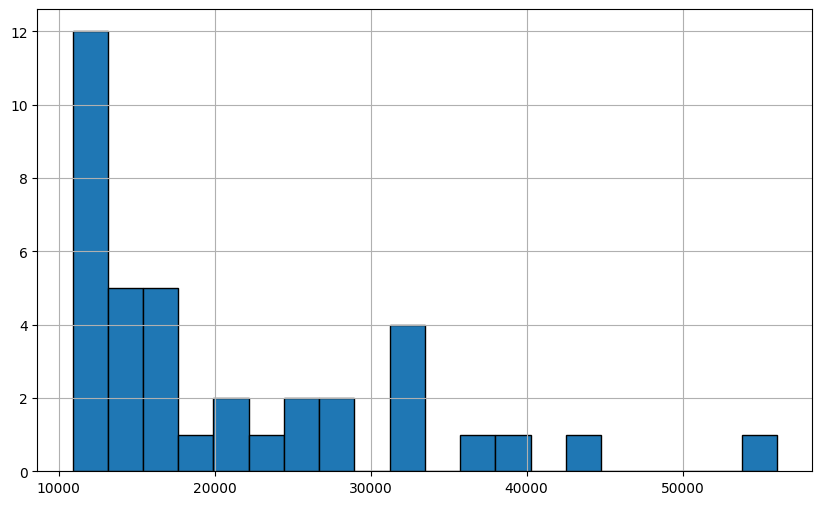

スレイヤー：商品数：230


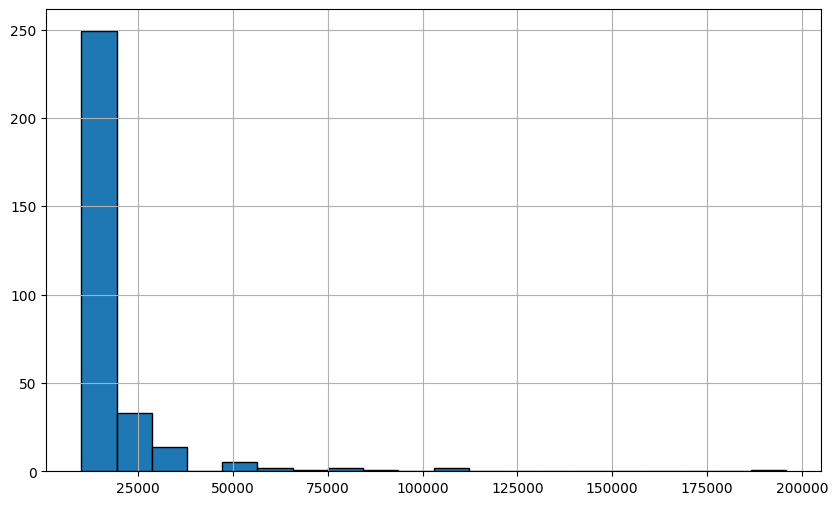

ニルヴァーナ：商品数：96


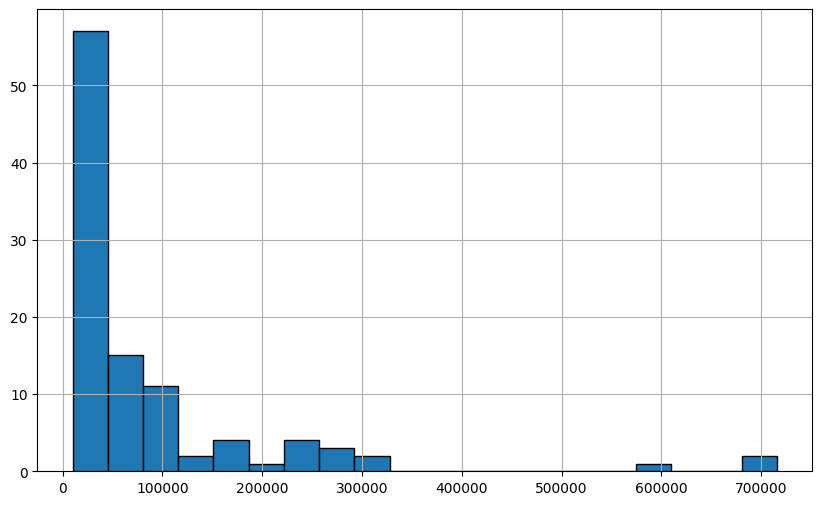

カートコバーン：商品数：98


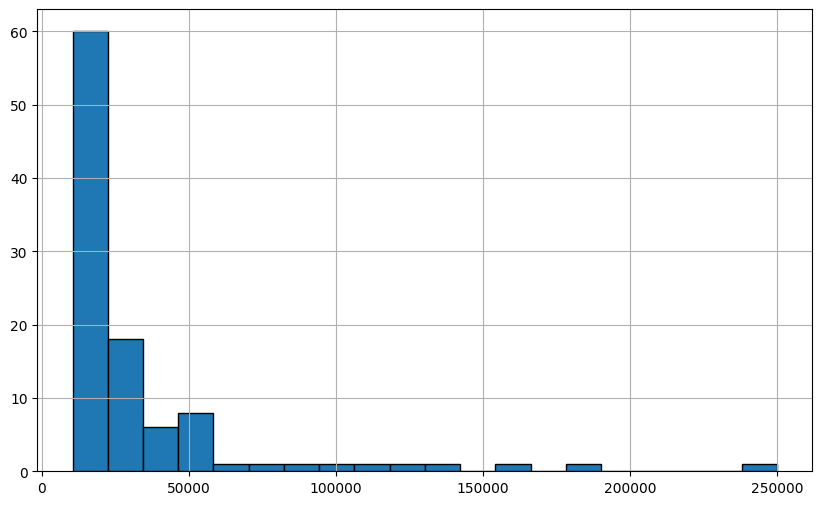

スリップノット：商品数：37


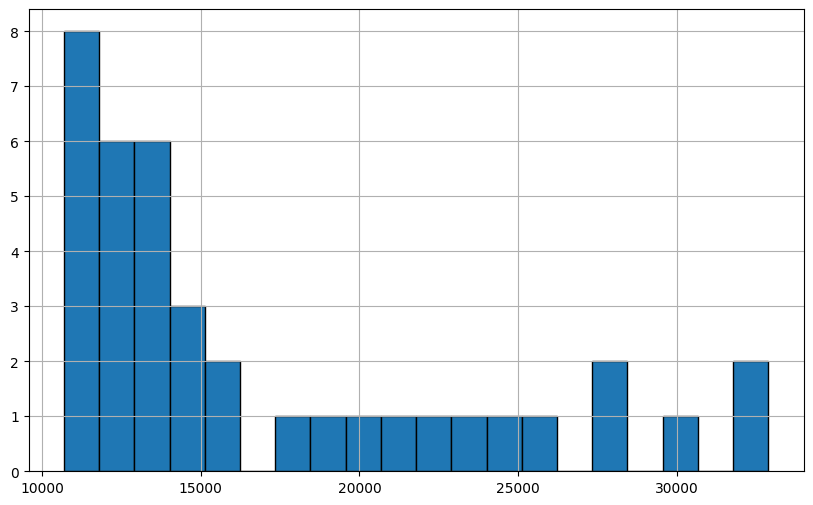

PINK FLOYD：商品数：102


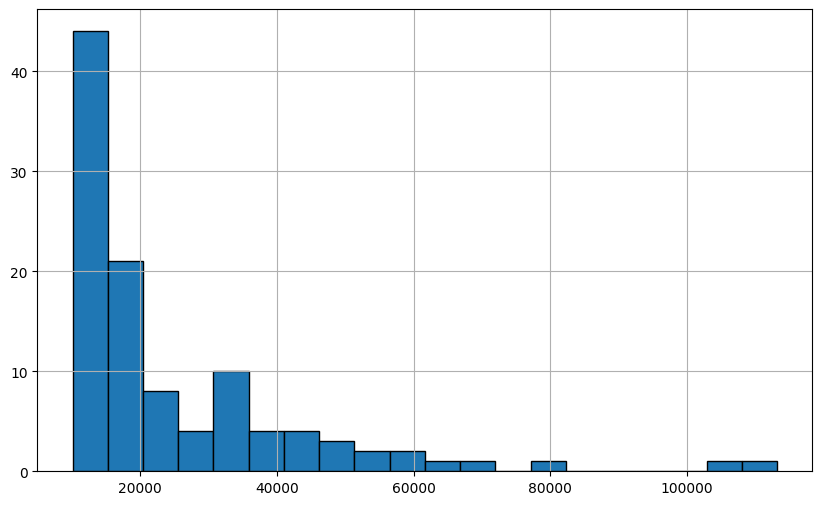

JOURNEY：商品数：37


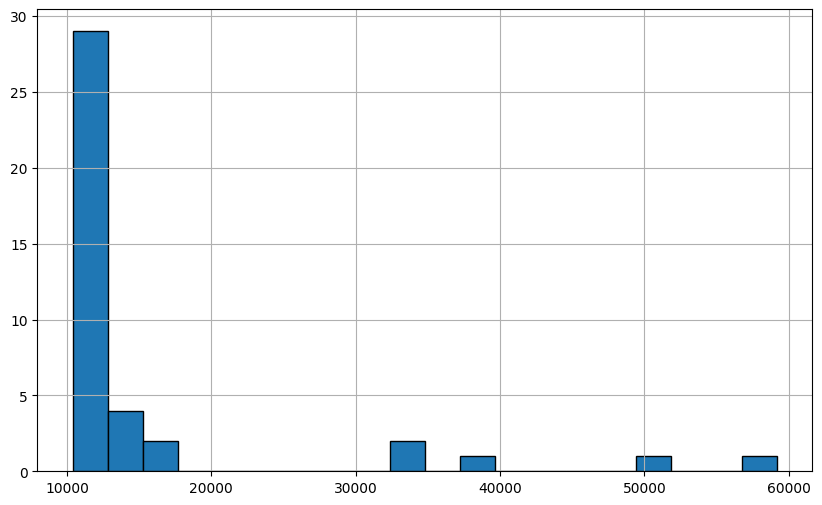

In [27]:
# バンドごとに価格帯の分布をプロット
bands = df_main_filtered["band_name"].unique()
with warnings.catch_warnings():
    warnings.simplefilter("ignore", UserWarning)
    for band in bands:
        print(
            f"{band}：商品数：{df_main_filtered[df_main_filtered['band_name'] == band]['name'].nunique()}"
        )
        band_data = df_main_filtered[df_main_filtered["band_name"] == band]
        plt.figure(figsize=(10, 6))
        plt.hist(band_data["price"], bins=20, edgecolor="black")
        plt.grid(True)
        plt.show()

In [14]:
print(
    "バンド別平均価格:",
    df_main_filtered.groupby("band_name")["price"].mean().sort_values(ascending=False),
)

バンド別平均価格: band_name
ニルヴァーナ           83588.735294
Guns N’ Roses    43555.710526
METALLICA          35271.4375
カートコバーン          33271.921569
PINK FLOYD       25071.485981
KISS             21377.889447
アイアンメイデン         21013.657895
ローリングストーンズ       20654.189474
Korn             18829.677419
スレイヤー             18077.83871
スリップノット          16818.684211
JOURNEY             15992.575
Name: price, dtype: object


In [15]:
print(
    "バンド別平均価格:",
    df_main_filtered.groupby("band_name")["price"]
    .median()
    .sort_values(ascending=False),
)

バンド別平均価格: band_name
ニルヴァーナ           34750.0
METALLICA        22500.0
カートコバーン          21725.0
Guns N’ Roses    21175.0
Korn             19690.0
アイアンメイデン         17090.0
ローリングストーンズ       16335.0
KISS             16200.0
PINK FLOYD       16200.0
スレイヤー            13970.0
スリップノット          13563.0
JOURNEY          11958.0
Name: price, dtype: object
